# Import Libraries
#### Standard

In [147]:
import os
import numpy as np
import pandas as pd

#### Visualization

In [232]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import colors
from matplotlib import rc
import seaborn as sns
import networkx as nx

#### Visualization Setting

In [149]:
color_palette = 'Set3'
title_size = 20
sns.set_style("whitegrid")

In [150]:
pd.set_option('display.max_rows', 5, 'display.max_columns', None)

In [151]:
font_name = fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# Import Data
Data Preprocessing 단계에서 생성된 통합 데이터 테이블을 불러온다

In [152]:
root = os.path.join(os.getcwd(), 'DATA')

df_raw = pd.read_csv(os.path.join(root, 'raw_data.csv'), index_col = 0)
df_project = pd.read_csv(os.path.join(root, 'project_data.csv'), index_col = 0)

code_jeom = pd.read_csv(os.path.join(root, 'jeom_code.csv'), index_col = 0)
code_jikwhi = pd.read_csv(os.path.join(root, 'jikwhi_code.csv'), index_col = 0)
code_jkmu = pd.read_csv(os.path.join(root, 'jkmu_code.csv'), index_col = 0)

직원 데이터는 지속적으로 참고해야 한다

In [153]:
df_jikwon = pd.read_csv(os.path.join(root, 'jikwon.csv'), encoding='cp949')

----

# Drop Data


요청구분은 무수정, 수정, 신규, 폐기, 총 4종류가 있는데 우리는 신규/수정한 이력만을 볼 것이다  
이를 통해 프로그램을 신규/수정한 이력이 없는 직원들도 제거된다

In [192]:
df_raw[['요청구분', '요청번호']].groupby('요청구분').count()

,요청번호
요청구분,
무수정,5557
수정,189113
신규,166315
폐기,8934


In [208]:
print(df_raw.shape, end="->")
df = df_raw[(df_raw['요청구분'] == '신규') | (df_raw['요청구분'] == '수정')]
print(df.shape)

(370040, 23)->(355428, 23)


In [209]:
df['요청구분'].unique()

array(['수정', '신규'], dtype=object)

# 분류하기

### 프로그램종류
프로그램 종류를 파악해서 어떤 언어/툴 등을 사용했는지 파악 가능

In [210]:
df[['프로그램종류']].drop_duplicates().reset_index(drop=True)

,프로그램종류
0,온라인서비스
1,채널화면_txt
...,...
69,CONFIG
70,웹_xadl(소스)


기술 스택을 파악하기에는 프로그램 종류에 대한 정보가 조금은 부족한 것 같다

각 프로그램 종류에 따라 어떤 언어나 툴을 사용하는지 파악할 수 있다면 좀 더 다양성을 줄이고 포괄적으로 데이터를 볼 수 있을 듯 하다

언어/툴/종류에 따라..

**몇가지 알아낸것**
1. 신자금세탁방지(AP) 프로그램종류 BAT_ : 배치성 코드
2. 신자금세탁방지(AP) 프로그램종류 ONL_ : 서비스 코드
3. 금융개발부 DBIO / DBIO MAP : 프로프레임3.0 // 글로개발부 DBI / DBIO MAP : 프로프레임4.0
>  금융개발부는 프로프레임3.0 사용 <-> 글로벌개발부은 프로프레임4.0 사용
4. 금융개발부 IO포맷 / 화면매핑 : iDev@BuildLink
5. 금융개발부 화면 : iDev@Tool
6. ICT운영부 클라우드 : 내부 gitlab 를 사용하여 프로젝트 관리 > 형상관리에서 끌어다가 GIT프로젝트로 표현


In [211]:
def add_class(row):
    program = row['프로그램종류']
    if program == '.net(dll)':
        return "VB"
    elif program == '2PC배치':
        return "C"
    elif program == 'BAT_Bean':
        return "JAVA"
    elif program == 'BAT_DBIO':
        return "JAVA"
    elif program == 'BAT_JAVA':
        return "JAVA"
    elif program == 'BAT_OMM':
        return "JAVA"
    elif program == 'BAT_Shell':
        return "JAVA"
    elif program == 'BAT_배치':
        return "JAVA"
    elif program == 'CONFIG':
        return "Shell"
    elif program == 'CTL':
        return "JAVA"
    elif program == 'DBIO':
        return "프로프레임"
    elif program == 'DBIO MAP':
        return "프로프레임"
    elif program == 'FLEX(.mxml)':
        return "FLEX"        
    elif program == 'FLEX(.swf)':
        return "FLEX"        
    elif program == 'FLEX(/bin 파일)':
        return "FLEX"
    elif program == 'FLEX(/src 파일)':
        return "FLEX"
    elif program == 'GIT프로젝트':
        return "Cloud"
    elif program == 'HTML':
        return "HTML"
    elif program == 'HTML5_html':
        return "HTML"
    elif program == 'HTML5_xml':
        return "HTML"
    elif program == 'HTML5_스크립트':
        return "HTML"
    elif program == 'HTML5_이미지':
        return "HTML"
    elif program == 'Header FILE':
        return "HEADER"
    elif program == 'IO포맷':
        return "iDev@BuildLink"
    elif program == 'IO포맷 ALL':
        return "iDev@BuildLink"
    elif program == 'Image':
        return "기티"
    elif program == 'Java':
        return "JAVA"
    elif program == 'MODULE':
        return "C"
    elif program == 'ONL_Bean':
        return "JAVA"
    elif program == 'ONL_DBIO':
        return "JAVA"
    elif program == 'ONL_JAVA':
        return "JAVA"
    elif program == 'ONL_JAVA Module':
        return "JAVA"
    elif program == 'ONL_OMM':
        return "JAVA"
    elif program == 'PACKAGE':
        return "기타"
    elif program == 'SCRIPT':
        return "Shell"
    elif program == 'SHELL':
        return "Shell"
    elif program == 'SQL':
        return "SQL"
    elif program == 'XML':
        return "xml"
    elif program == '거래코드':
        return "C"
    elif program == '공통모듈':
        return "C"
    elif program == '배치':
        return "C"        
    elif program == '배치(*.pc)':
        return "C"
    elif program == '배치코드':
        return "C"
    elif program == '상주배치':
        return "C"
    elif program == '스크립트(긴급)':
        return "Shell"
    elif program == '스크립트(일반)':
        return "Shell"
    elif program == '실행모듈(서버)':
        return "Server"
    elif program == '연동코드':
        return "C"
    elif program == '온라인서비스':
        return "C"
    elif program.startswith('웹'):
        return "Web"
    elif program == '채널매핑룰':
        return "iDev@BuildLink"
    elif program == '채널매핑룰.chl':
        return "iDev@BuildLink"
    elif program == '채널매핑룰.rule':
        return "iDev@BuildLink"
    elif program == '채널화면_MAP':
        return "iDev@Tool"
    elif program == '채널화면_js':
        return "iDev@Tool"
    elif program == '채널화면_mrd':
        return "iDev@Tool"
    elif program == '채널화면_scn':
        return "iDev@Tool"
    elif program == '채널화면_trn':
        return "iDev@Tool"
    elif program == '채널화면_txt':
        return "iDev@Tool"
    elif program == '프로프레임소스(.c)':
        return "C"
    elif program == '화면_VB':
        return "VB"
    elif program == '후행성배치':
        return "C"

In [212]:
df['A'] = df.apply(lambda x: add_class(x), axis=1)

<ipython-input-212-dd9b0abdc934>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['A'] = df.apply(lambda x: add_class(x), axis=1)


In [213]:
df['A_COUNT'] = df.groupby(['A', '프로그램종류'])[['JIKWON_NO']].transform('count')

<ipython-input-213-1a3db8c09650>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['A_COUNT'] = df.groupby(['A', '프로그램종류'])[['JIKWON_NO']].transform('count')


In [237]:
df['B_COUNT'] = df.groupby(['시스템유형', '업무그룹', '업무'])[['JIKWON_NO']].transform('count')

In [240]:
df.head(2)

,JIKWON_NO,JEOM_NO,JIKGUN,JIKGEUB,JIKWHI,JIKWHI2,JUJKMU_C,JUJKMU_RATE,BUJKMU_C,BUJKMU_RATE,JUMJANG_G,HOBONG,BUIM_ILJA,시스템유형,업무그룹,업무,프로그램종류,프로그램명,프로젝트번호,요청일자,요청구분,요청번호,프로그램경로,A,A_COUNT,B_COUNT
0,20101491,63,20004,5,20164,3,11609.0,100.0,NaN,0.0,0,43440,20210201,코어,External Channel,펌뱅킹,온라인서비스,sfis2100d.c,P2021-00342-01,2021-01-20,수정,2021-04-002421,/nbsdev/fib/fis/src,C,15617,531
1,20101491,63,20004,5,20164,3,11609.0,100.0,NaN,0.0,0,43440,20210201,코어,External Channel,펌뱅킹,온라인서비스,sfis7100a.c,P2021-00342-01,2021-01-20,수정,2021-04-002421,/nbsdev/fib/fis/src,C,15617,531


직원 한명에 대해서만 본다고 생각했을때,
**프로그램종류**를 봐서 기술스택 파악을 할 수 있을 것

6163718 직원에 대한 정보를 봐보자


In [241]:
selected_jikwon = 6163718
df_6163718 = df[df['JIKWON_NO'] == selected_jikwon]

### 프로그램종류

In [242]:
with pd.option_context('display.max_rows', df.shape[0]+1):
    display(df_6163718[['JIKWON_NO', '프로그램종류', '요청번호']].groupby(['JIKWON_NO', '프로그램종류']).count())

요청번호
JIKWON_NO 프로그램종류            
6163718   DBIO            10
          DBIO MAP        40
          Header FILE      3
          IO포맷             2
          IO포맷 ALL        10
          MODULE          19
          SHELL            9
          XML              9
          거래코드            18
          공통모듈             2
          배치              17
          배치(*.pc)        11
          상주배치             4
          연동코드            13
          온라인서비스          70
          웹_비지니스(.xml)     3
          웹_서식(.xml)       4
          채널매핑룰           10
          채널화면_MAP        15
          채널화면_mrd         3
          채널화면_txt        15

In [218]:
df_기술 = df_6163718[['JIKWON_NO', 'A', '프로그램종류', 'A_COUNT']].drop_duplicates().sort_values(['A', '프로그램종류']).reset_index(drop=True)

In [300]:
 (data_for_dash['JIKWON_NO'].unique())

array([20101491,  7101368,  6226493,  6145272, 20100248, 19200617,
       18100309, 16200780, 20200862,  6163645,  8103224, 20100124,
       14100940, 20100078, 20200961, 18200168, 21100144,  6182933,
        6164293,  6218131, 20101325, 21200106,  6208444,  6167454,
        6217885, 18200044, 20101287, 18200427, 21100081,  6132790,
       19101244, 21100306, 20100061, 18100570, 20101260, 18201369,
        6146856, 18100181, 10505024, 20200810,  6173837, 17100674,
       12102423, 18100953, 12103195,  6182925, 18100368,  6150608,
        6220819, 21100098,  6173772,  6164102, 18200753, 19100809,
       13200119, 19101236, 17101158,  6220495,  6180035,  6151401,
       18101811,  6174670, 16101464, 19200285, 14100680,  6168590,
       20100175, 12102600, 19101200, 20101279, 21200191,  6133819,
        6210554,  6130399, 20101473,  6171461, 20200099, 15101850,
       19201524, 20100116, 21100233, 15100626, 17100460, 19100639,
       12200255, 20200080, 10100806,  6224784, 19100851, 21100

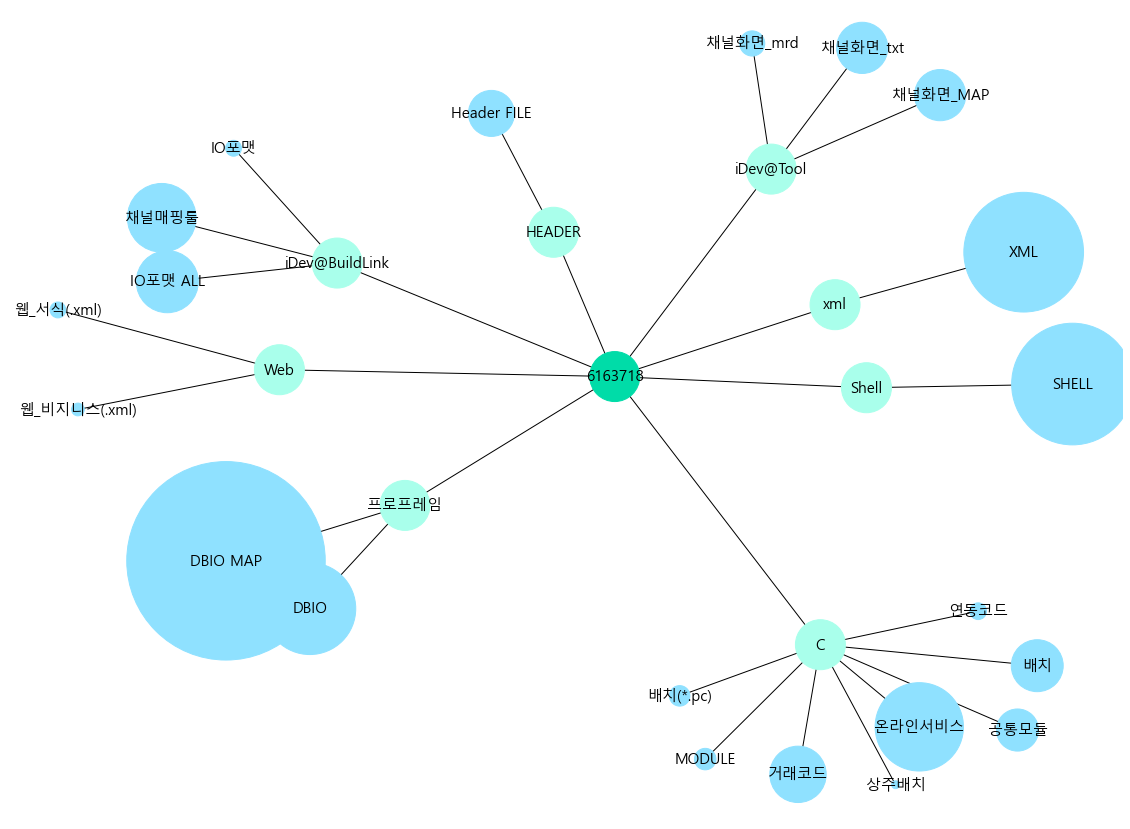

In [269]:
fig, ax = plt.subplots(figsize=(20, 15))

# Set Edges
f1 = list(df_기술['JIKWON_NO'].array) + list(df_기술['A'].array)
t1 = list(df_기술['A'].array) + list(df_기술['프로그램종류'].array)

relationship1 = pd.DataFrame({'from': f1, 'to': t1})

# Create DF for node characteristics
tmp1 = list(df_기술['A'].unique())
tmp2 = list(df_기술['프로그램종류'].unique())
carac = pd.DataFrame({'ID': [selected_jikwon] + tmp1 + tmp2, 
                      'type': ['jikwon_no'] + ['A' for _ in range(len(tmp1))] + ['program' for _ in range(len(tmp2))]})

# Create graph object
G = nx.from_pandas_edgelist(relationship1, 'from', 'to', create_using=nx.Graph())

# Make types into categories
carac = carac.set_index('ID')
carac = carac.reindex(G.nodes())

carac['type'] = pd.Categorical(carac['type'])
carac['type'].cat.codes

# Specify colors
cmap = colors.ListedColormap(['#a9ffeb', '#00dca8', '#8fe1ff'])

node_sizes1 = [2500 for _ in range(len(tmp1) + 1)] + list(map(lambda x: x * 0.5, df_기술['A_COUNT'].array))

# Draw graph
nx.draw(G, with_labels=True, node_color=carac['type'].cat.codes, node_size=node_sizes1, font_family=font_name, font_size=15, cmap=cmap)


In [270]:
pos=nx.fruchterman_reingold_layout(G)

In [271]:
Nodes = [comp for comp in nx.connected_components(G)] # Looks for the graph's communities
Edges = G.edges()

In [272]:
labels = [] # names of the nodes to plot
group = [] # id of the communities
group_cnt = 0

for subgroup in Nodes:
    group_cnt += 1
    for node in subgroup:
        labels.append(node)
        group.append(group_cnt)

# labels, group = (list(t) for t in zip(*sorted(zip(labels, group))))

layt = nx.spring_layout(G, dim=2) # Generates the layout of the graph
Xn = [layt[k][0] for k in list(layt.keys())]  # x-coordinates of nodes
Yn = [layt[k][1] for k in list(layt.keys())]  # y-coordinates
Xe = []
Ye = []

for e in Edges:
    Xe += [layt[e[0]][0], layt[e[1]][0], None]
    Ye += [layt[e[0]][1], layt[e[1]][1], None]
    ax = (layt[e[0]][0]+layt[e[1]][0])/2
    ay = (layt[e[0]][1]+layt[e[1]][1])/2

trace1 = go.Scatter(  x=Xe,
                      y=Ye,
                      mode='lines',
                      line=dict(color='rgb(90, 90, 90)', width=1),
                      hoverinfo='none'
                    )

trace2 = go.Scatter(  x=Xn,
                      y=Yn,
                      mode='markers+text',
                      name='Nodes',
                      marker=dict(symbol='circle',
                                  size=8,
                                  color=group,
                                  colorscale='Viridis',
                                  line=dict(color='rgb(255,255,255)', width=1)
                                  ),
                      text=labels,
                      textposition='top center',
                      hoverinfo='none'
                      )

xaxis = dict(
            backgroundcolor="rgb(200, 200, 230)",
            gridcolor="rgb(255, 255, 255)",
            showbackground=True,
            zerolinecolor="rgb(255, 255, 255)"
            )
yaxis = dict(
            backgroundcolor="rgb(230, 200,230)",
            gridcolor="rgb(255, 255, 255)",
            showbackground=True,
            zerolinecolor="rgb(255, 255, 255)"
            )

layout = go.Layout(
    title='test',
    width=700,
    height=700,
    showlegend=False,
    plot_bgcolor="rgb(230, 230, 200)",
    scene=dict(
        xaxis=dict(xaxis),
        yaxis=dict(yaxis)
    ),
    margin=dict(
        t=100
    ),
    hovermode='closest')
data = [trace1, trace2]
fig = go.Figure(data=data, layout=layout)
plotDir = root + "/"

plot(fig, filename=root + "test.html")

'C:\\Users\\13579\\Desktop\\Workplace\\Data-Driven-HR\\민서\\DATAtest.html'

### 시스템유형
어떤 업무인지 파악 > 직원의 업무 역량 파악 가능

In [244]:
df_업무 = df_6163718[['JIKWON_NO', '시스템유형', '업무그룹', '업무', 'B_COUNT']].drop_duplicates().sort_values(['시스템유형', '업무그룹', '업무']).reset_index(drop=True)

In [245]:
with pd.option_context('display.max_rows', df_업무.shape[0]+1):
    display(df_업무)

,JIKWON_NO,시스템유형,업무그룹,업무,B_COUNT
0,6163718,단위,단위-대외계,단위-대외계펌뱅킹,221
1,6163718,웹컨텐츠,디지털창구_전자서식,디지털창구_전자서식,902
2,6163718,코어,External Channel,전자금융,19
3,6163718,코어,External Channel,펌뱅킹,531


In [246]:
# Set Edges
f2 = list(df_업무['JIKWON_NO'].array) + list(df_업무['시스템유형'].array) + list(df_업무['업무그룹'].array)
t2 = list(df_업무['시스템유형'].array) + list(df_업무['업무그룹'].array) + list(df_업무['업무'].array)

relationship2 = pd.DataFrame({'from': f2, 'to': t2})

In [ ]:
# Set Visual
# carac = pd.DataFrame({'ID': [6163718] + tmp + tmp2, 
#                       'type': ['no'] + ['A' for _ in range(len(tmp))] + ['program' for _ in range(len(tmp2))]})
# carac.set_index('ID')

In [252]:
tmp_length = len(df_업무['시스템유형'].unique()) + len(df_업무['업무그룹'].unique())
node_sizes1 = [2500 for _ in range(tmp_length)] + list(map(lambda x: x * 15, df_업무['B_COUNT'].array))

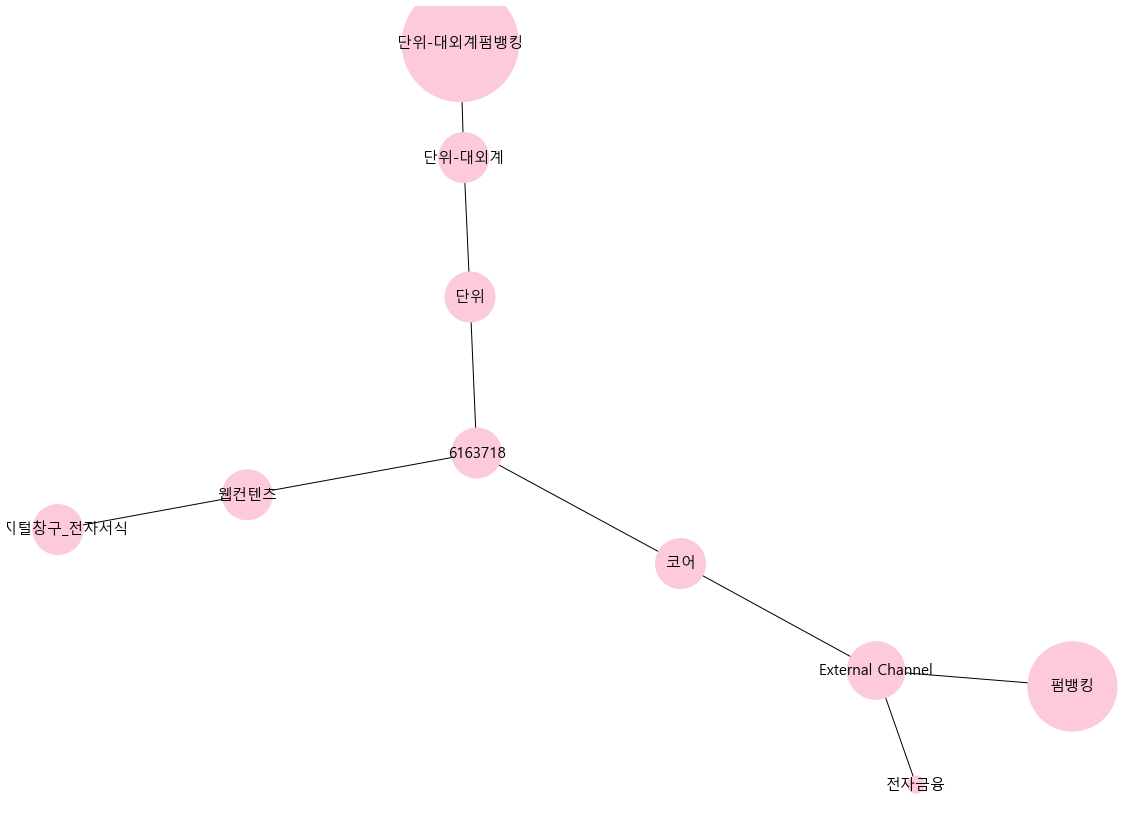

In [253]:
fig, ax = plt.subplots(figsize=(20,15))
G = nx.from_pandas_edgelist(relationship2, 'from', 'to', create_using=nx.Graph())

nx.draw(G, with_labels=True, node_color='#fcc9dd', node_size=node_sizes1, font_family=font_name, font_size=15)

# Export Data

In [278]:
data_for_dash = pd.merge(left=df[['JIKWON_NO', '시스템유형', '업무그룹', '업무', '프로그램종류', 'A', 'A_COUNT', 'B_COUNT']],
                         right=df_jikwon[['JIKWON_NO', 'NAME']],
                         how='left', left_on='JIKWON_NO', right_on='JIKWON_NO')

In [279]:
data_for_dash

,JIKWON_NO,시스템유형,업무그룹,업무,프로그램종류,A,A_COUNT,B_COUNT,NAME
0,20101491,코어,External Channel,펌뱅킹,온라인서비스,C,15617,531,신범철
1,20101491,코어,External Channel,펌뱅킹,온라인서비스,C,15617,531,신범철
...,...,...,...,...,...,...,...,...,...
355426,18101798,코어,수신,수익증권,채널화면_mrd,iDev@Tool,1266,842,민남규
355427,18101798,코어,수신,수익증권,온라인서비스,C,15617,842,민남규


In [280]:
data_for_dash.to_csv(os.path.join(root, 'data_for_dash.csv'), na_rep='NaN')

In [290]:
data = data_for_dash[data_for_dash['JIKWON_NO'] == selected_jikwon]

In [296]:
for f, t in zip(list(data['A']), list(data['프로그램종류'])):
    print(f, t)

C 배치
C 온라인서비스
프로프레임 DBIO
C MODULE
xml XML
C 거래코드
C 온라인서비스
C 배치
HEADER Header FILE
C MODULE
Web 웹_비지니스(.xml)
프로프레임 DBIO MAP
C 온라인서비스
iDev@Tool 채널화면_txt
C 온라인서비스
프로프레임 DBIO MAP
iDev@BuildLink 채널매핑룰
C 연동코드
프로프레임 DBIO
iDev@Tool 채널화면_txt
C 온라인서비스
iDev@BuildLink IO포맷 ALL
iDev@Tool 채널화면_MAP
iDev@BuildLink 채널매핑룰
C 온라인서비스
iDev@Tool 채널화면_MAP
C 온라인서비스
프로프레임 DBIO MAP
C 배치
프로프레임 DBIO MAP
프로프레임 DBIO MAP
프로프레임 DBIO MAP
xml XML
C MODULE
Web 웹_서식(.xml)
C 온라인서비스
C 거래코드
C MODULE
C 거래코드
C 배치(*.pc)
프로프레임 DBIO MAP
C MODULE
C 배치(*.pc)
C 연동코드
프로프레임 DBIO MAP
iDev@Tool 채널화면_txt
프로프레임 DBIO MAP
C 거래코드
C 온라인서비스
C MODULE
C 온라인서비스
iDev@Tool 채널화면_txt
C 온라인서비스
프로프레임 DBIO
C 연동코드
C 온라인서비스
Web 웹_비지니스(.xml)
iDev@BuildLink 채널매핑룰
C 상주배치
C 상주배치
C 상주배치
C 거래코드
C 배치(*.pc)
C 배치(*.pc)
C 연동코드
C 온라인서비스
프로프레임 DBIO MAP
C 온라인서비스
iDev@Tool 채널화면_txt
Shell SHELL
iDev@Tool 채널화면_txt
프로프레임 DBIO MAP
C 온라인서비스
C MODULE
C MODULE
C 연동코드
iDev@Tool 채널화면_MAP
iDev@BuildLink IO포맷 ALL
C MODULE
프로프레임 DBIO MAP
C 온라인서비스
프로프레임 DBIO MAP
C 거래코드
iDev@BuildLi